# Apply k-NN and SVM for digit recognition

Before applying Deep Learning, we first apply the most simple machine learning models : k nearest neighthood model and support vector machine model as baseline models.

In [1]:
import os
import numpy as np
import pandas as pd
from mnist import MNIST
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# use MNIST package to import mnist data
mnidata = MNIST(os.getcwd()+'/Data')
train_images, train_labels = mnidata.load_training()
test_images, test_labels = mnidata.load_testing()
print('Training set size: '+ str(len(train_labels)))
print('Testing set size:' + str(len(test_labels)))

Training set size: 60000
Testing set size:10000


In [3]:
# dataset is too large for personal computer. Reduce dataset by using pandas sample function.
train_images_sample = pd.DataFrame(train_images).sample(n=10000,random_state = 1)
train_labels_sample = pd.Series(train_labels).iloc[train_images_sample.index]
test_images_sample = pd.DataFrame(test_images).sample(n=1000,random_state = 1)
test_labels_sample = pd.Series(test_labels).iloc[test_images_sample.index]

Training data size: 10000


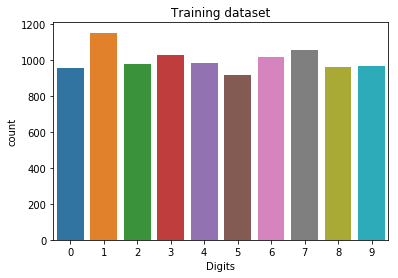

In [4]:
train_labels = pd.Series(train_labels_sample).to_frame(name='label').groupby('label').size().reset_index(name = 'count')
print('Training data size: ' + str(len(train_images_sample)))
_ = sns.barplot(x= 'label', y = 'count', data = train_labels)
_ = plt.title('Training dataset')
_ = plt.xlabel('Digits')

Testing data size: 1000


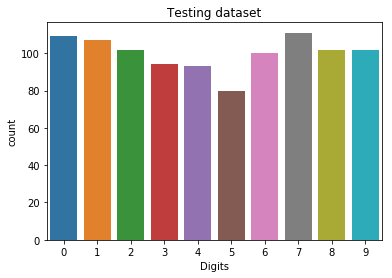

In [5]:
test_labels = pd.Series(test_labels_sample).to_frame(name='label').groupby('label').size().reset_index(name = 'count')
print('Testing data size: ' + str(len(test_labels_sample)))
_ = sns.barplot(x= 'label', y = 'count', data = test_labels)
_ = plt.title('Testing dataset')
_ = plt.xlabel('Digits')

In [6]:
# Convert to numpy array
train_images_sample = train_images_sample.values
train_labels_sample = train_labels_sample.values
test_images_sample = test_images_sample.values
test_labels_sample = test_labels_sample.values

#### k Nearest Neighbors Model Implementation

In [7]:
# Set neighbor number as 5
kNN_model = KNeighborsClassifier(n_neighbors = 5).fit(train_images_sample, train_labels_sample)

In [8]:
Prediction = kNN_model.predict(test_images_sample)
kNN_model.score(test_images_sample, test_labels_sample)

0.95

In [9]:
def squareFormat(x):
    square = np.array(x)
    square.resize(28,28)
    return square
    
def showImg(x,label):
    plt.imshow(x, cmap = 'gray')
    plt.title('Predicted digit: '+ str(label))
    plt.xticks([])
    plt.yticks([])

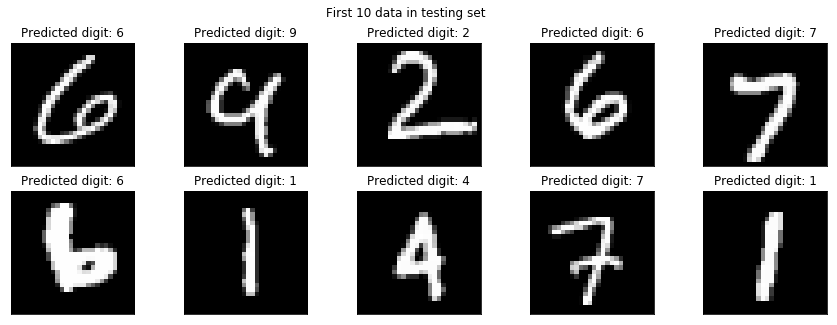

In [10]:
fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 data in testing set')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(test_images_sample[i-1]), Prediction[i-1])

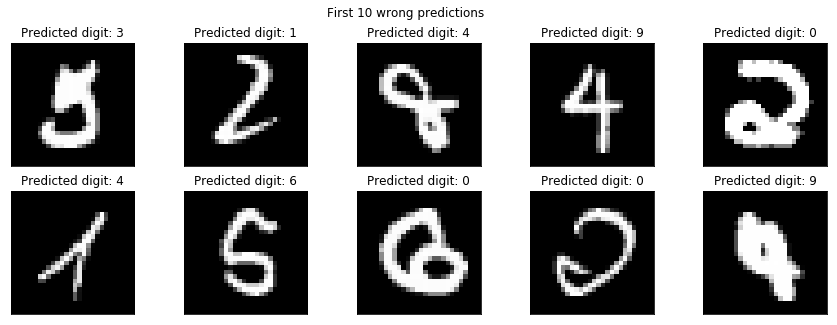

In [11]:
img = test_images_sample[Prediction!=test_labels_sample][0:10]
pre = Prediction[Prediction!=test_labels_sample][0:10]

fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 wrong predictions')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(img[i-1]), pre[i-1])

From the result plots, we can observe that kNN performs well on digit recognition. Some inaccurately predicted digits are very tricky.

#### Support vector machine Implementation

In [12]:
svm_model = svm.SVC(gamma = 0.001)

In [13]:
svm_model.fit(train_images_sample, train_labels_sample)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
svm_model.score(train_images_sample, train_labels_sample)

1.0

In [15]:
svm_model.score(test_images_sample, test_labels_sample)

0.107

In [16]:
Prediction = svm_model.predict(test_images_sample)

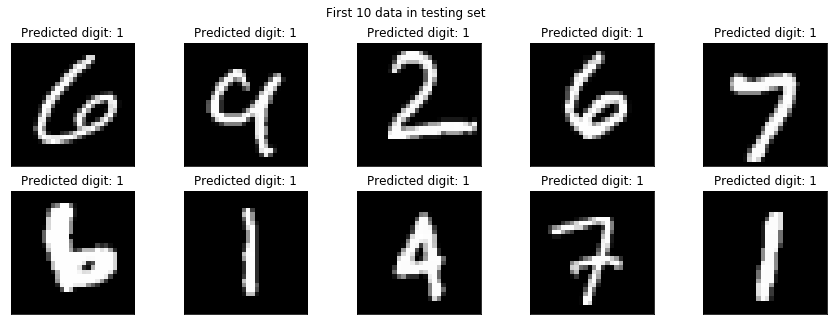

In [17]:
fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 data in testing set')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(test_images_sample[i-1]), Prediction[i-1])

Directly apply image data is a bad decision for svm. We need preprocess the image for using svm.

Binary image version

In [18]:
# copy, and convert the image to binary image
svm_train_sampe = train_images_sample.copy()
svm_train_sampe[svm_train_sampe>0] = 1
svm_test_sampe = test_images_sample.copy()
svm_test_sampe[svm_test_sampe>0] = 1

In [19]:
svm_model.fit(svm_train_sampe, train_labels_sample)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svm_model.score(svm_train_sampe, train_labels_sample)

0.9318

In [21]:
svm_model.score(svm_test_sampe, test_labels_sample)

0.919

In [22]:
Prediction = svm_model.predict(svm_test_sampe)

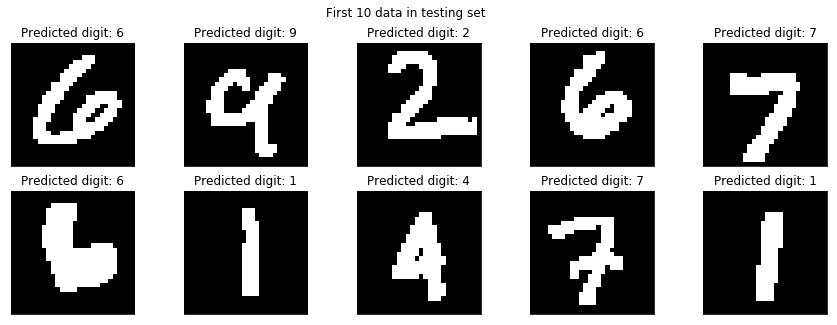

In [23]:
fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 data in testing set')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(svm_test_sampe[i-1]), Prediction[i-1])

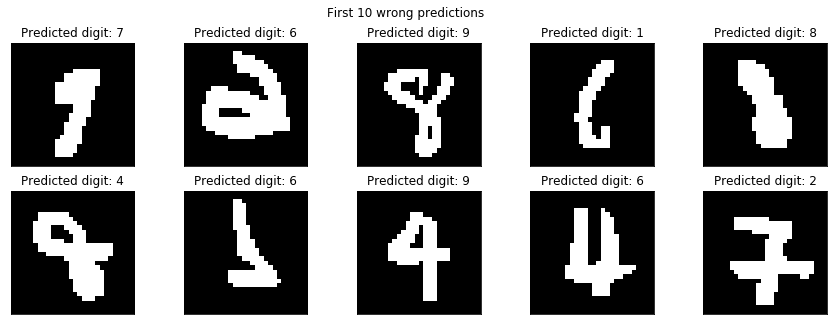

In [24]:
img = svm_test_sampe[Prediction!=test_labels_sample][0:10]
pre = Prediction[Prediction!=test_labels_sample][0:10]

fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 wrong predictions')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(img[i-1]), pre[i-1])

PCA version

In [25]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=256).fit(svm_train_sampe)
pca.components_.shape

(256, 784)

In [52]:
pca_train = pca.transform(svm_train_sampe)
pca_test = pca.transform(svm_test_sampe)

In [53]:
svm_model.fit(pca_train, train_labels_sample)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
svm_model.score(pca_train, train_labels_sample)

0.9301

In [55]:
svm_model.score(pca_test, test_labels_sample)

0.917

In [57]:
Prediction = svm_model.predict(pca_test)

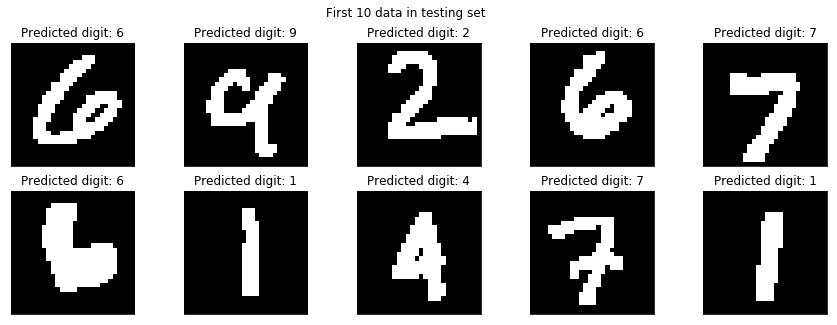

In [60]:
fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 data in testing set')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(svm_test_sampe[i-1]), Prediction[i-1])

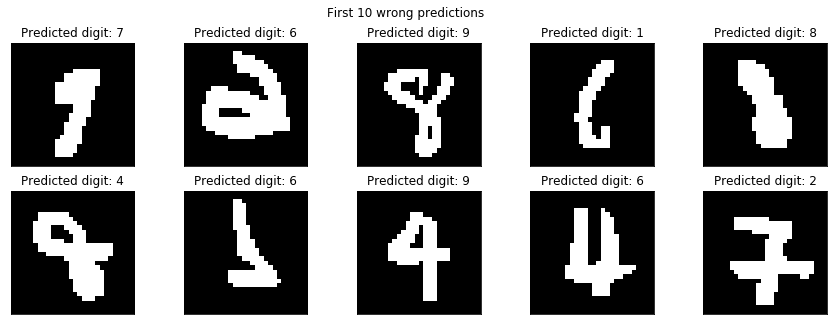

In [61]:
img = svm_test_sampe[Prediction!=test_labels_sample][0:10]
pre = Prediction[Prediction!=test_labels_sample][0:10]

fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 wrong predictions')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(img[i-1]), pre[i-1])

Applying pca, we can reduce a lot of training time but still have similar quality results. We can apply better normalize technique to enhance the reuslt. For example, apply L-2 norm normalization.